LET THE MODEL RUNNNN!!!!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
data_train = pd.read_csv("Google_Stock_Price_Train.csv")
Training = data_train.iloc[:,1:2].values
sc = MinMaxScaler(feature_range=(0,1))
Training_scalled = sc.fit_transform(Training)

In [3]:
X_train=[]
y_train=[]
for i in range(60,len(Training)):
    X_train.append(Training_scalled[i-60:i,0])
    y_train.append(Training_scalled[i,0])
X_train,y_train= np.array(X_train),np.array(y_train)

RESHAPING  BCOZ X TRAIN IS STILL 2D WHERE KERAS WORKS ON 3D FORMAT = > .RESHAPE(WHO TO RESHAPE, DIMENSIONS)

In [4]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

IMPORTING THE KERAS LIBRARIES!!

In [7]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

MODEL CREATION!!!

In [8]:
regressor = Sequential()

# first Layer!!!
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Second Layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Third Layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Fourth Layer
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# OutPut Layer
regressor.add(Dense(units = 1))

B:\annaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Compilation & Fit

In [9]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 13s 70ms/step - loss: 0.0348
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 0.0067 
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 0.0055 
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 0.0059 
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 0.0056 
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 0.0048 
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 0.0051 
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - loss: 0.0048 
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - loss: 0.0046 
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 0.0044 
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 0.0043 
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 0.0043 
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 0.0044 
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 0.0038 
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 

Using Test Data

In [10]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [12]:
dataset_total = pd.concat((data_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


Final Plotting!!!

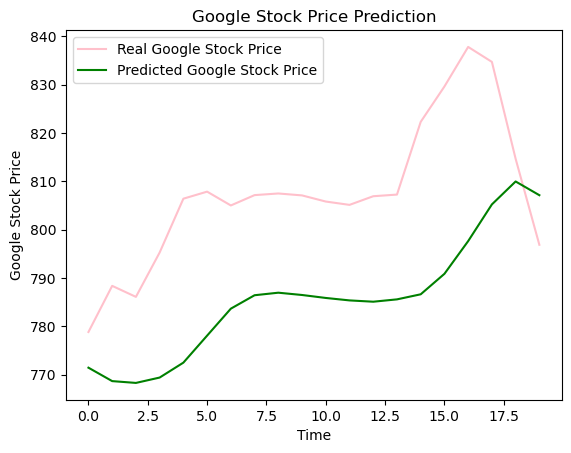

In [13]:
plt.plot(real_stock_price, color = 'pink', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

MODEL READY!!!